In [1]:
import sys, pandas
import uproot
# import HDFStore
import matplotlib.pyplot as plt

In [2]:
filename = "../ntuplesPixel/debugHits_MC_ZMM_CluRefFull_BIS.root"
plot_dir = "../ntuplesPixel/plots/" + filename.split("_")[-2] + "/"
print(plot_dir)
file = uproot.open(filename)

../ntuplesPixel/plots/CluRefFull/


In [3]:
file.allkeys()

[b'clusterInfo;1', b'clusterInfo/tree;9', b'clusterInfo/tree;8']

In [4]:
tree = file[b'clusterInfo/tree;9']

In [51]:
tree.keys()

[b'run',
 b'lumi',
 b'bx',
 b'instLumi',
 b'npv',
 b'pair_mass',
 b'track_pt',
 b'track_eta',
 b'track_phi',
 b'track_global_phi',
 b'track_global_z',
 b'track_local_x',
 b'track_local_y',
 b'track_exp_sizeX',
 b'track_exp_sizeY',
 b'track_exp_charge',
 b'hit_global_phi',
 b'hit_global_z',
 b'hit_local_x',
 b'hit_local_y',
 b'hit_firstpixel_x',
 b'hit_firstpixel_y',
 b'hit_sizeX',
 b'hit_sizeY',
 b'hit_chi2',
 b'hit_charge',
 b'pv_ndof',
 b'pv_z0',
 b'tag_dz',
 b'tag_dxy',
 b'pv_xyErr',
 b'pv_zErr',
 b'track_dz',
 b'track_dxy',
 b'track_dzErr',
 b'track_dxyErr',
 b'detid',
 b'roc',
 b'source_det',
 b'source_layer',
 b'hitFound',
 b'hitOnTrack',
 b'hitInRandomWindow',
 b'hitInRandomWindowDistance',
 b'detIsActive',
 b'maybeBadROC',
 b'trackHasHit',
 b'trackHasLostHit',
 b'track_alpha',
 b'track_beta',
 b'cluster_center_x',
 b'cluster_center_y',
 b'cluster_charge_in_hits',
 b'cluster_column_ON',
 b'cluster_chargeBroken_in_hits',
 b'cluster_columnBroken_ON',
 b'trackfromPV_global_phi',
 b

In [5]:
# tree.pandas.df().to_pickle("debugHits_MC_ZMM_CluRefFull_BIS.pkl")
print("%s in %s contains %d ntuples." % (tree.name, filename, len(tree)))

b'tree' in ../ntuplesPixel/debugHits_MC_ZMM_CluRefFull_BIS.root contains 295316 ntuples.


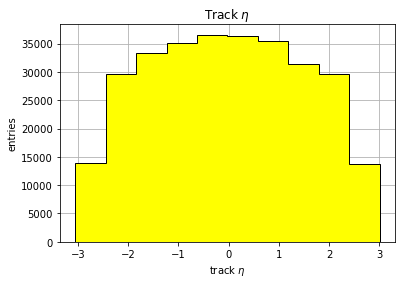

In [53]:
plt.hist(tree[b'track_eta'].array(), facecolor='yellow', ec='black', histtype='stepfilled')
plt.xlabel('track $\eta$')
plt.ylabel('entries')
plt.title('Track $\eta$')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.rc('axes', axisbelow=True)
plt.grid(True)
#plt.savefig(plot_dir + "track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "track_eta.png", format="png", dpi=300)
plt.show()

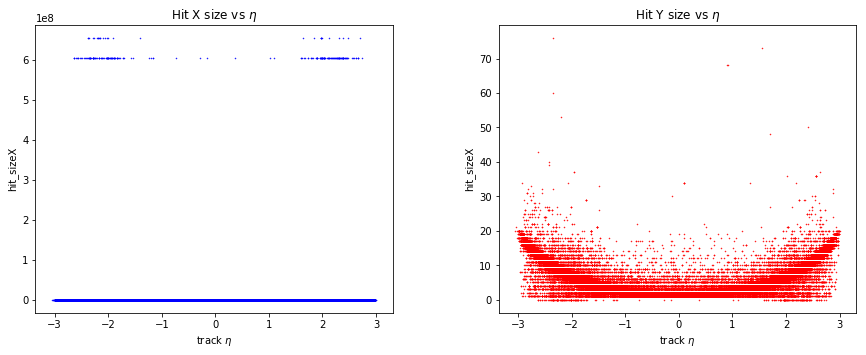

In [54]:
plt.subplot(1,2,1)
plt.scatter(tree[b'track_eta'].array(),tree[ b'hit_sizeX'].array(), marker='.', color='blue', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit X size vs $\eta$')
plt.subplot(1,2,2)
plt.scatter(tree[b'track_eta'].array(),tree[ b'hit_sizeY'].array(), marker='.', color='red', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit Y size vs $\eta$')
plt.tight_layout()
plt.subplots_adjust(bottom=0.0, top= 1.0, left=0.1, right=2.0)

plt.show()

Hit X size seems to be close to zero, while hit Y size seems to correlate with $\eta$.
We expect in fact "longer" clusters with the increasing of $\eta$ since we are getting far from the IP.

Some events at around $|\eta| \in [2,3]$ are strange because they have an extremely high hit size in x direction. We try to exclude them to see the behavior of hit X size for small size.

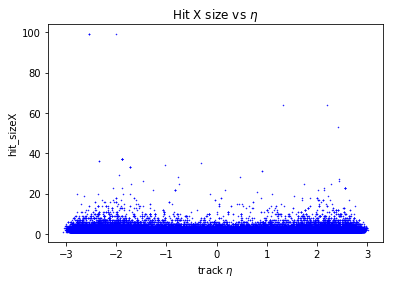

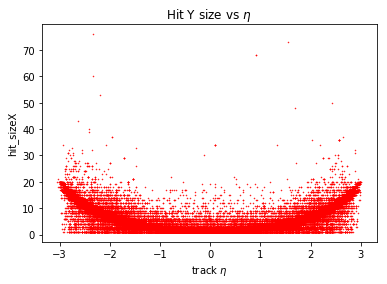

,track_eta,hit_sizeX,hit_sizeY
track_eta,1.000000,-0.009638,-0.039844
hit_sizeX,-0.009638,1.000000,0.194658
hit_sizeY,-0.039844,0.194658,1.000000


In [6]:
df_all = tree.pandas.df([b'track_eta',b'hit_sizeX',b'hit_sizeY'])
df_all.head()

threshold = 1e6
df_all = df_all.query('hit_sizeX < ' + str(threshold))

#plt.subplot(1,2,1)
plt.scatter(df_all['track_eta'],df_all['hit_sizeX'], marker='.', color='blue', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit X size vs $\eta$')
#plt.savefig(plot_dir + "hit_sizeX_vs_track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "hit_sizeX_vs_track_eta.png", format="png", dpi=300)
plt.show()

#plt.subplot(1,2,2)
plt.scatter(df_all['track_eta'],df_all['hit_sizeY'], marker='.', color='red', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit Y size vs $\eta$')
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.0, top= 1.0, left=0.1, right=2.0)
#plt.savefig(plot_dir + "hit_sizeY_vs_track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "hit_sizeY_vs_track_eta.png", format="png", dpi=300)
plt.show()


df_all.corr()

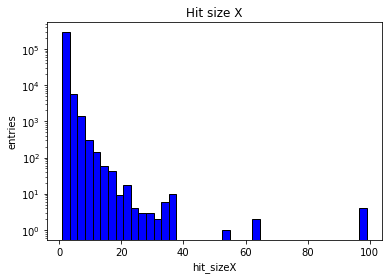

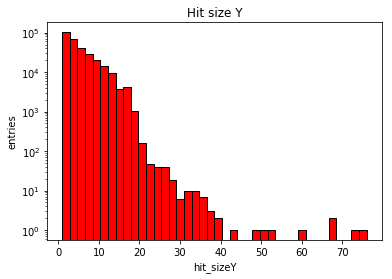

In [56]:
#plt.subplot(1,2,1)
plt.hist(df_all['hit_sizeX'], bins=40, facecolor='blue', ec='black', log=True)
plt.xlabel('hit_sizeX')
plt.ylabel('entries')
plt.title('Hit size X')
plt.savefig(plot_dir + "hit_sizeX.png", format="png", dpi=300)
plt.show()
#plt.subplot(1,2,2)
plt.hist(df_all['hit_sizeY'], bins=40, facecolor='red', ec='black', log=True)
plt.xlabel('hit_sizeY')
plt.ylabel('entries')
plt.title('Hit size Y')
plt.savefig(plot_dir + "hit_sizeY.png", format="png", dpi=300)
plt.show()

In [63]:
df_hit = tree.pandas.df([b'All_hits_charge', b'All_hits_Px', b'All_hits_Py', 
                         b'cluster_center_x', b'cluster_center_y', 
                         b'hit_sizeX', b'hit_sizeY',
                         b'track_eta',b'track_phi',
                         b'track_local_x', b'track_local_y',
                         b'track_exp_sizeX', b'track_exp_sizeY', b'track_exp_charge',

                         ])
count_hit = df_hit.count()
print(count_hit[0]/len(tree))
print(count_hit)
# df_sel = df_all.loc[(df_all['hit_sizeX'] < 1e6) ]

141.74836785003183
All_hits_charge     41860561
All_hits_Px         41860561
All_hits_Py         41860561
cluster_center_x    41860561
cluster_center_y    41860561
hit_sizeX           41860561
hit_sizeY           41860561
track_eta           41860561
track_phi           41860561
track_local_x       41860561
track_local_y       41860561
track_exp_sizeX     41860561
track_exp_sizeY     41860561
track_exp_charge    41860561
dtype: int64


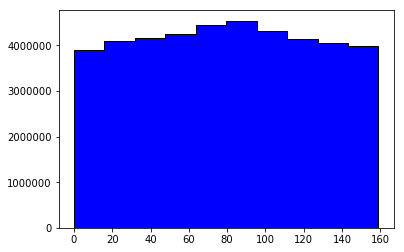

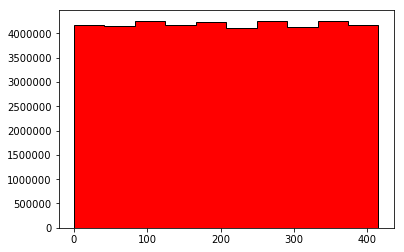

In [58]:
plt.hist(df_hit['All_hits_Px'], color= 'blue', ec='black', histtype='stepfilled')
plt.show()
plt.hist(df_hit['All_hits_Py'], color= 'red', ec='black', histtype='stepfilled')
plt.show()

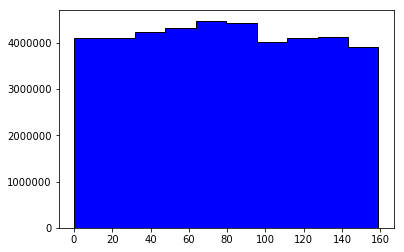

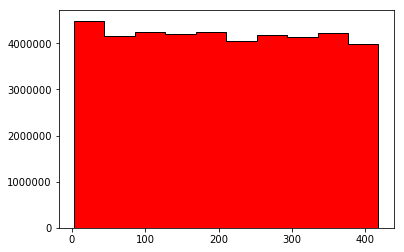

In [59]:
plt.hist(df_hit['cluster_center_x'], color='blue', ec='black', histtype='stepfilled')
plt.show()
plt.hist(df_hit['cluster_center_y'], color='red', ec='black', histtype='stepfilled')
plt.show()

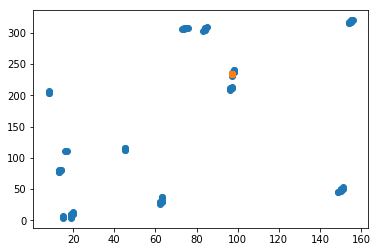

In [60]:
plt.scatter(df_hit['All_hits_Px'][0],df_hit['All_hits_Py'][0])
plt.scatter(df_hit['cluster_center_x'][0],df_hit['cluster_center_y'][0])
plt.show()

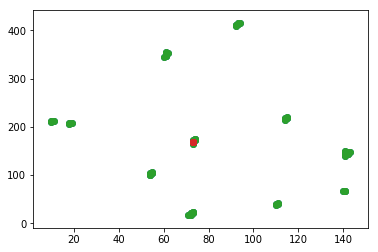

In [62]:
plt.scatter(df_hit['All_hits_Px'][1],df_hit['All_hits_Py'][1])
plt.scatter(df_hit['cluster_center_x'][1],df_hit['cluster_center_y'][1])
plt.show()

In [ ]:
plt.hist(df_hit['All_hits_charge'], color='yellow', ec='black', histtype='stepfilled')
plt.xlabel('All_hits_charge')
plt.ylabel('entries')
plt.title('All_hits_charge')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.rc('axes', axisbelow=True)
plt.grid(True)
#plt.savefig(plot_dir + "track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "All_hits_charge.png", bins=20, format="png", dpi=300)
plt.show()

In [ ]:
#print(df_hit['All_hits_charge'][0])
plt.scatter(df_hit['All_hits_Px'][0], df_hit['All_hits_charge'][0])
plt.show()